```text
=================================================

Supervised Learning Project

Created By  : Ahmad Naufal Budianto

=================================================
```

# Introduction

The dataset I am using is from a Portuguese Banking institution, containing client data related to the bank's telemarketing campaign. The goal of the `supervised learning` program I developed is to classify and predict the success of the telemarketing team in selling term deposit services. This term deposit campaign ran for one year, from January to December.

The prediction aims to identify which algorithm best predicts the target. I will compare algorithms such as `KNN`, `SVM`, `Decision Tree`, `Random Forest`, and `XGBoosting`. The best-performing model will undergo hyperparameter tuning to determine the most efficient parameters for prediction.

In addition to classification prediction, the analysis from this program is expected to help the telemarketing team identify and evaluate the metrics that influence clients to make term deposits.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Library to find correlation.
from scipy.stats import kendalltau

# Library to split the data.
from sklearn.model_selection import train_test_split

# Libraries to create pipeline for transformation, normalization, and modelling.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Libraries to find best model.
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings

# Library to saving the best model.
import pickle

# 1. Data Loading

In [2]:
# Display max columns.
pd.set_option("display.max_columns", 500)

# Load CSV to dataset.
df = pd.read_csv("/Users/Naufal's/Desktop/Hacktiv8 Tugas/p1-ftds031-rmt-m2-naufalbudianto28/bank-full.csv", sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

From the summary results of the dataset `df`, this data contains `45,211 entries` with `16 feature columns` and the column "y" as the target. Additionally, this data has no missing values and already has the appropriate data types.

In [5]:
df.head(13)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


| Column | Type | Description |
| --- | --- | --- |
| age | Integer | Client's age data |
| job | Categorical | Client's job type data |
| marital | Categorical | Client's marital status |
| education | Categorical | Client's education level |
| default | Binary | Does the client have credit in the bank? |
| balance | Integer | Client's average yearly balance (€) |
| housing | Binary | Does the client have a housing loan with the bank? |
| loan | Binary | Does the client have a personal loan with the bank? |
| contact | Categorical | Type of communication with the client |
| day | Integer | Last day the client was contacted |
| month | Categorical | Last month the client was contacted |
| duration | Integer | Duration of the last contact (seconds) |
| campaign | Integer | 	Number of contact attempts made to the client **during** the campaign |
| pdays | Integer | Number of days since the client was last contacted from the previous campaign (if -1, never contacted) |
| previous | Integer | Number of contact attempts made to the client **before** the campaign |
| poutcome | Categorical | Outcome of the marketing efforts in the previous campaign |
| **y** | Binary | This is the **target** classification indicating whether the client subscribed to a term deposit (yes/no) |

# 2. Exploratory Data Analysis (EDA)

## Basic Data Distribution

This visual exploration is conducted to observe the demographics of the bank's clients, where the data to be visualized includes the columns `age`, `job`, `marital`, `education`, `balance`, `default`, `housing`, and `loan`.

### A. Age Distribution

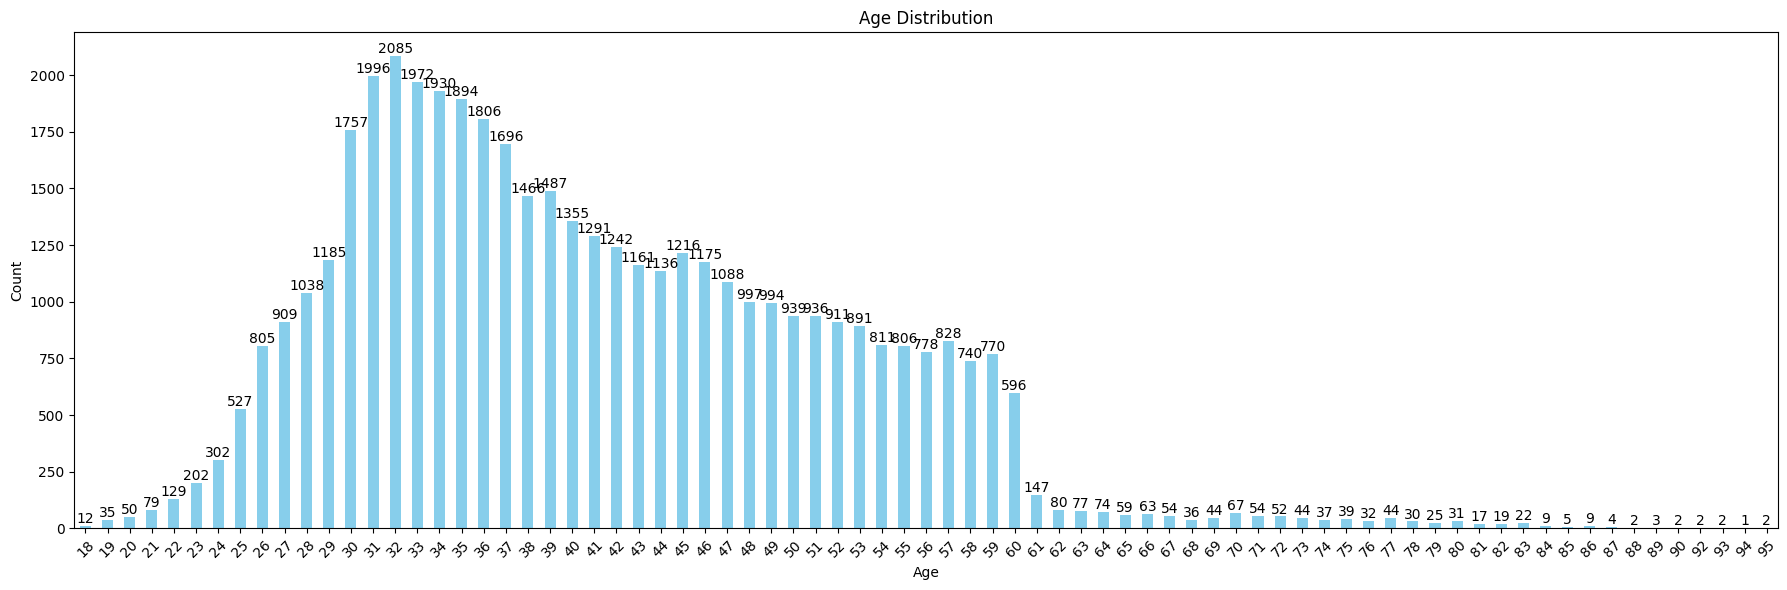

In [6]:
plt.figure(figsize=(18, 6))

# Make age distribution bar chart.
age_bar = df['age'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show each bar value.
for p in age_bar.patches:
    age_bar.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

From the results of the data visualization above, it can be concluded that the majority of Portuguese Bank clients are dominated by:
* `Early Adults` (ages 25-35 years), which is the productive period for most people,
* `Mid-Adults` (ages 36-45 years), where most people are already married and hold mid-level positions in their careers,
* `Late-Adults` (ages 46-60 years), where most people are experiencing the peak of their careers and are preparing to enter retirement.

### B. Job Distribution

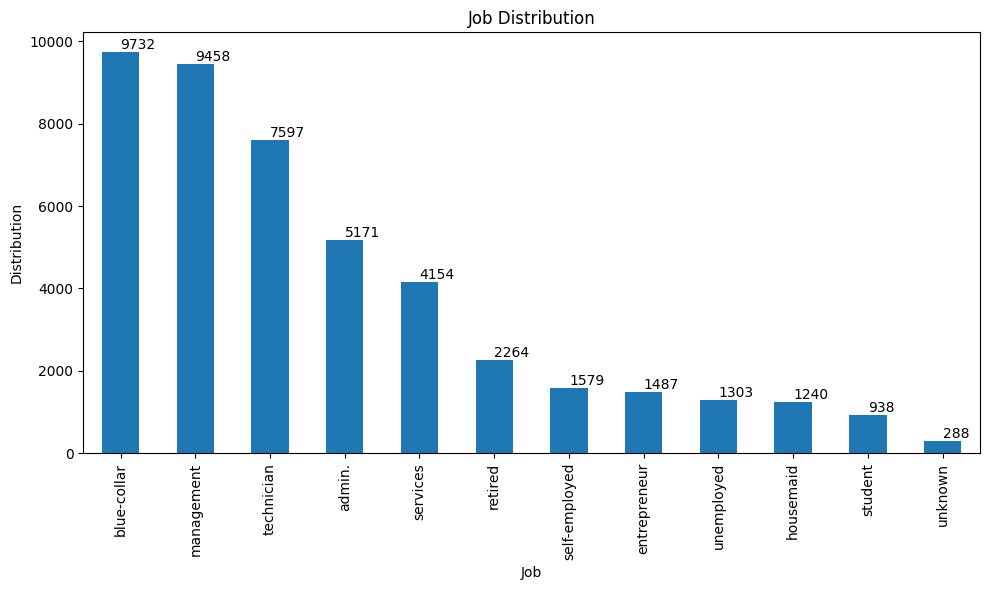

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Job distribution descending bar plotting. 
group_job = df['job'].value_counts().sort_values(ascending=False)
group_job.plot(kind='bar', ax=ax)
ax.set_title('Job Distribution')
ax.set_xlabel('Job')
ax.set_ylabel('Distribution')

# Show each bar value.
for bar in ax.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')


plt.tight_layout()
plt.show()

In line with the results of the visual analysis of the clients' age distribution, the dataset of Portuguese Bank clients shows that the majority of their clients are workers (Adults - productive age). However, if we look closely at the visualization above, there are some anomalies, namely:

* A typo in the job type with the value `admin.` which should be `admin`,
* The presence of the job type `unknown` which should be **filled in** for Portuguese Bank's administrative purposes,

I will address these anomalies during the `Feature Engineering` process.

### C. Marital Status Distribution

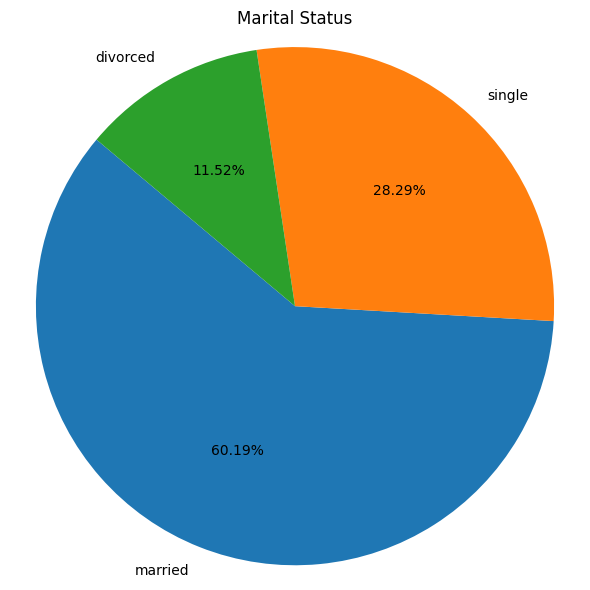

In [8]:
marital_counts = df['marital'].value_counts()

# Marital status distribution pie-chart plotting.
plt.figure(figsize=(6, 6))
pie_chart = plt.pie(marital_counts, labels=marital_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Marital Status')
plt.axis('equal')
plt.tight_layout()
plt.show()

The results of the visual analysis on marital status show that Portuguese Bank clients are predominantly people who are married. In line with the analysis of age distribution and job types, which are dominated by the 30-40 age range, where the majority of people are generally married, it can be seen from the marital status analysis results that it is dominated by `married` with `60.2%`, followed by `single` with `28.3%`.

### D. Education Background Distribution

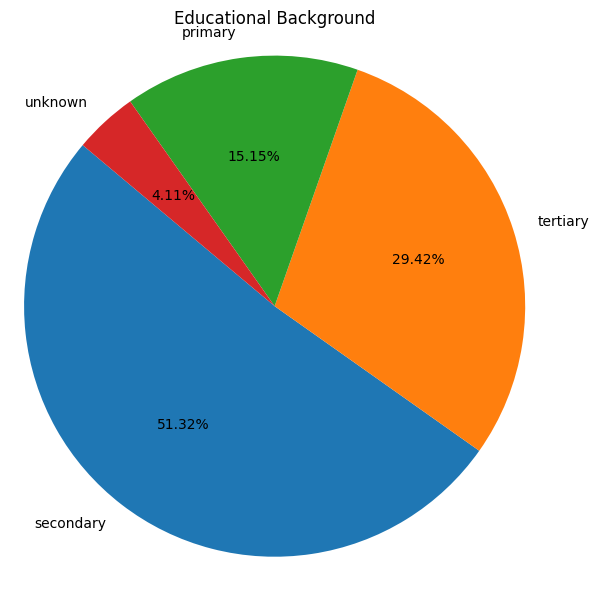

In [9]:
ed_counts = df['education'].value_counts()

# Education background distribution pie-chart plotting.
plt.figure(figsize=(6, 6))
pie_chart_2 = plt.pie(ed_counts, labels=ed_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Educational Background')
plt.axis('equal')
plt.tight_layout()
plt.show()

The educational background data has values of `primary` (Elementary School), `secondary` (Middle School-High School/Vocational School), and `tertiary` (College). From the visual exploration results, it is found that Portuguese Bank clients are predominantly from **secondary (51.3%)** and **tertiary (29.4%)** educational backgrounds. This aligns with the job type visualization results, showing that clients are dominated by `blue-collar` (manual industry workers), most of whom are vocational school (secondary) graduates.

However, this exploration also reveals **an anomaly**, which is the presence of the value `unknown` in the educational background data. Since this is part of personal biodata and an administrative requirement, logically, there should be no `unknown` educational background in the dataset. Therefore, I will **remove** the rows with `unknown` educational background values during the `feature engineering` process.

### E. Balance Distribution

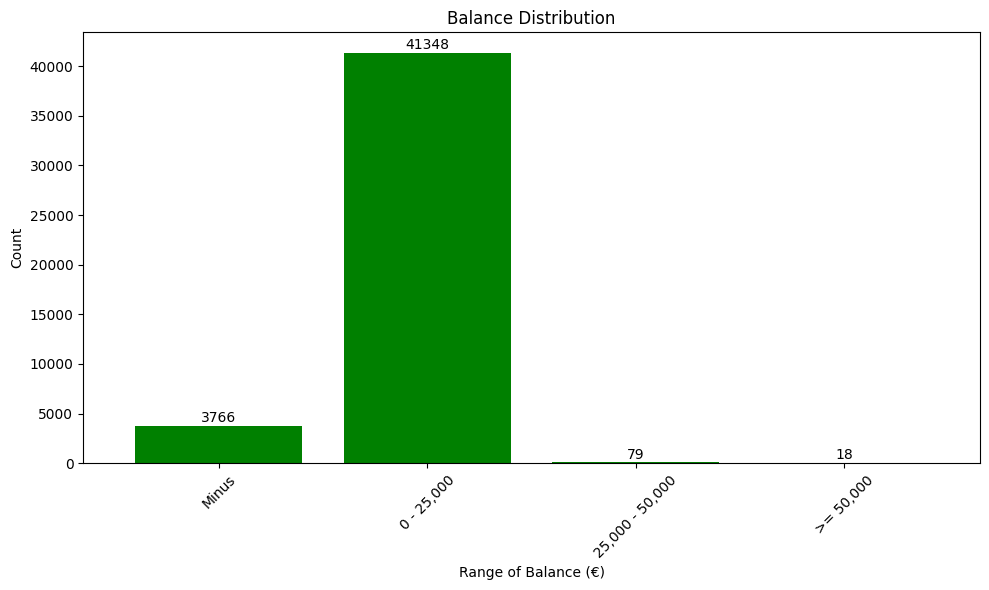

In [10]:
# Define bins.
bins = [-float('inf'), 0, 25000, 50000, float('inf')]
labels = ['Minus', '0 - 25,000', '25,000 - 50,000', '>= 50,000']

# Make new column `balance_category`, based on bins.
df['balance_category'] = pd.cut(df['balance'], bins=bins, labels=labels, right=False)

# `balance_category` value counts.
balance_distribution = df['balance_category'].value_counts().sort_index()

# Bar chart plotting.
plt.figure(figsize=(10, 6))
balance_distribution.plot(kind='bar', color='green', width=0.8)

# Show each bar value.
for i, v in enumerate(balance_distribution):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Balance Distribution')
plt.xlabel('Range of Balance (€)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Drop new column `balance_category`. 
df = df.drop('balance_category', axis=1)

The results of the visual analysis on the average balance distribution of Portuguese Bank clients show that the majority of clients have an average bank balance in the range of €0-25,000, with a percentage of `91.5%`.

An interesting insight is that the visualization shows `8.3%` of clients have a **negative balance** (< €0). This could be caused by several factors, such as:
* Possible `default` or bad credit, considering that Portuguese Bank also offers credit cards, personal loans, and mortgage installments.
* `No income` and then being deducted by monthly administrative fees; looking at the job visualization results, there are `~8%` of clients who are unemployed and retired.

### F. Credit and Loan Distribution

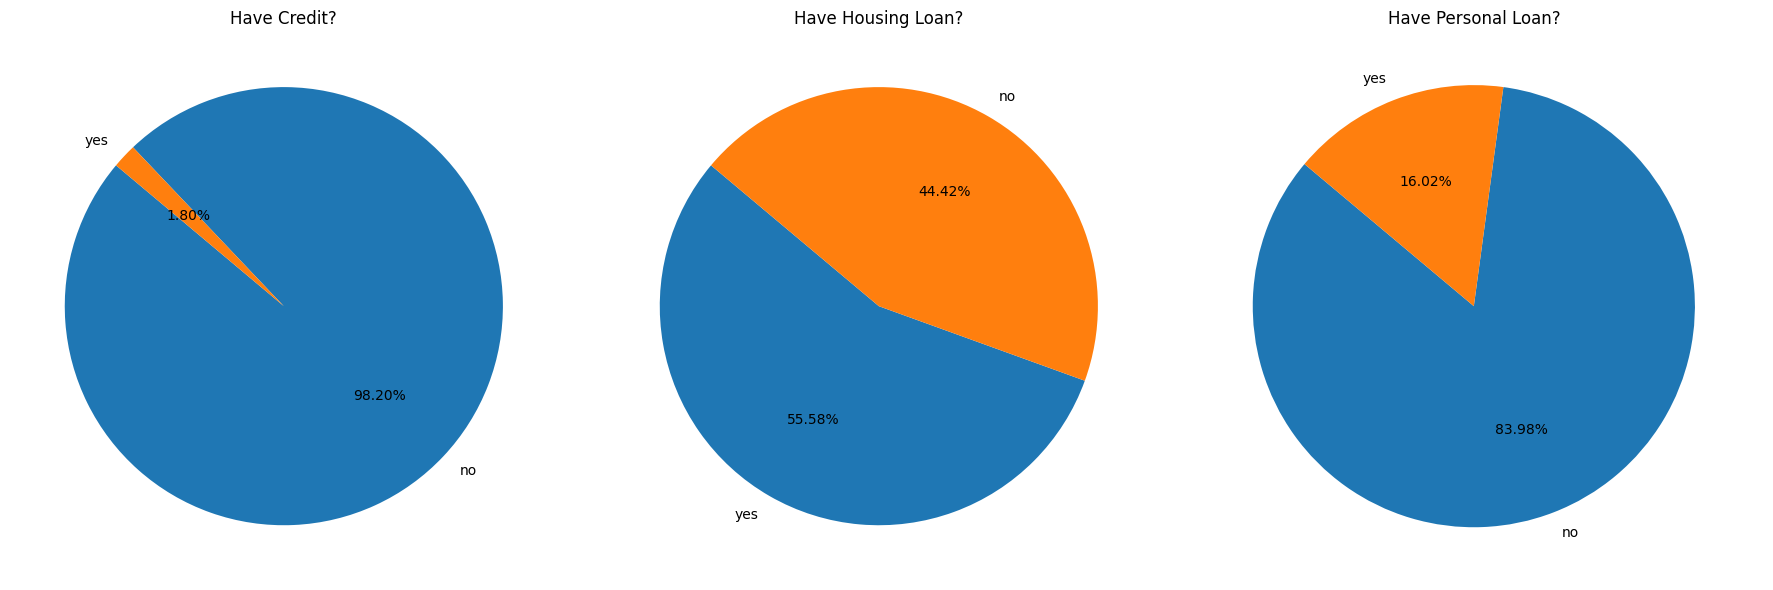

In [12]:
# Counting each value of credit and loan binary columns.
default_counts = df['default'].value_counts()
housing_counts = df['housing'].value_counts()
loan_counts = df['loan'].value_counts()

# Pie-chart plotting in one row.
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.pie(default_counts, labels=default_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Have Credit?')

plt.subplot(1, 3, 2)
plt.pie(housing_counts, labels=housing_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Have Housing Loan?')

plt.subplot(1, 3, 3)
plt.pie(loan_counts, labels=loan_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Have Personal Loan?')

plt.axis('equal')
plt.tight_layout()
plt.show()

The pie chart above shows the percentage of usage of loan/installment services offered by Portuguese Bank to its clients. The `mortgage` service is the most favored by Portuguese Bank clients, with `55.6%` of users. Logically, this aligns with the demographics of Portuguese Bank clients, who are predominantly **workers and married**, indicating a need for adequate housing for their families.

## Telemarketing Data Distribution

### A. Telemarketing Type Distribution

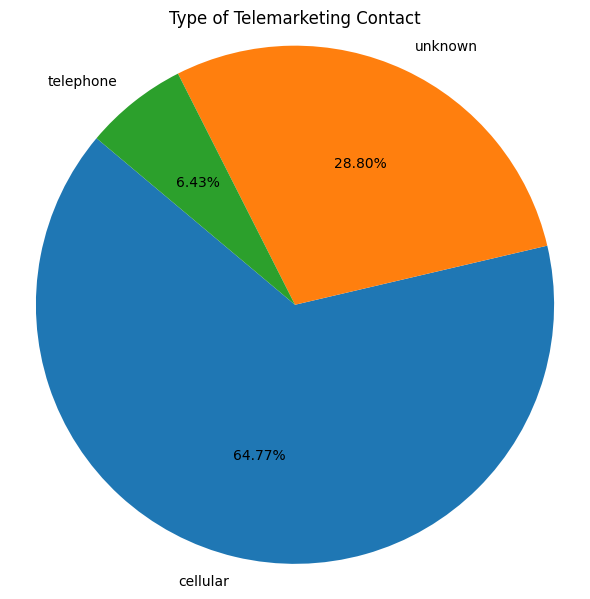

In [13]:
tc_counts = df['contact'].value_counts()

# Telemarketing type distribution pie-chart plotting.
plt.figure(figsize=(6, 6))
pie_chart_tc = plt.pie(tc_counts, labels=tc_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Type of Telemarketing Contact')
plt.axis('equal')
plt.tight_layout()
plt.show()

The visualization above shows the types of telemarketing that the Portuguese Bank Telemarketing Team uses to offer their campaigns. It can be seen that their clients tend to be more active/responsive through `mobile phones` (cell phones) with a value of `65%` compared to landline phones with a value of 6.4%. **However**, there is also a telemarketing type `unknown`. This could be due to data on clients who have never been contacted or campaigned to, resulting in an unknown value. In this case, I will **not address** the `unknown` value in the `contact` column, as it reflects the authenticity of data that influences the insights for the Telemarketing Team.

### B. Duration of The Contact Distribution

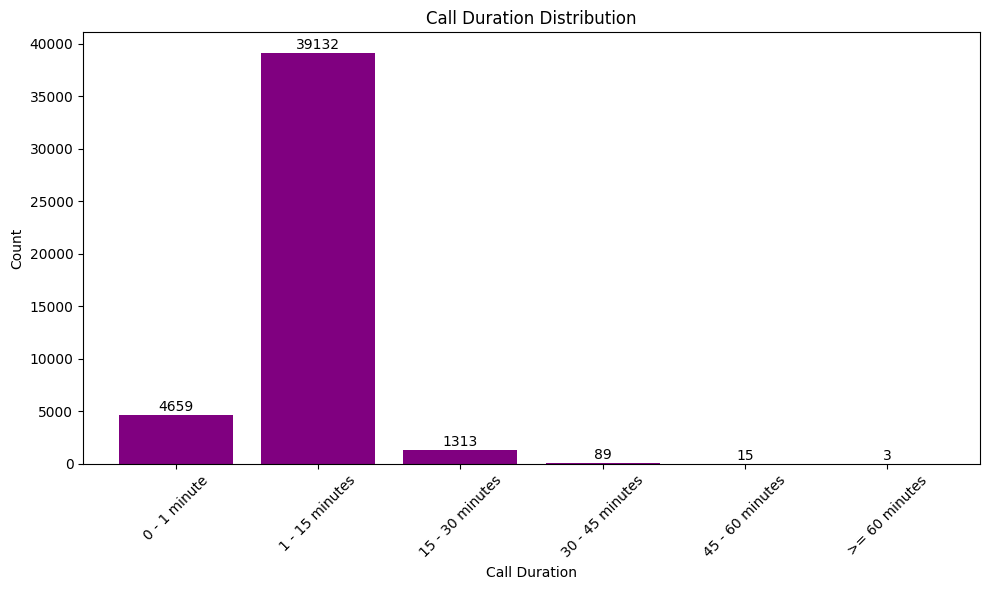

In [14]:
# Groupping the duration.
bins = [-float('inf'), 60, 900, 1800, 2700, 3600, float('inf')]
labels = ['0 - 1 minute', '1 - 15 minutes', '15 - 30 minutes', '30 - 45 minutes', '45 - 60 minutes', '>= 60 minutes']

# Make new duration category column.
df['dur_category'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)

# Duration value count.
dur_distribution = df['dur_category'].value_counts().sort_index()

# Bar chart plotting.
plt.figure(figsize=(10, 6))
dur_distribution.plot(kind='bar', color='purple', width=0.8)

# Show each bar value.
for i, v in enumerate(dur_distribution):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Call Duration Distribution')
plt.xlabel('Call Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Drop `dur_category` new column. 
df = df.drop('dur_category', axis=1)

From the visual exploration results of the **last call duration** column conducted by the Portuguese Bank Telemarketing Team, it can be seen that the **majority** of calls they make with clients are **less than 30 minutes**. This **indicates** that most of their clients are busy people (do not have much time), as shown by the job and age exploration results, that their clients are in the productive working age. **However**, an interesting point in the graph is that there are around `4659` calls with a duration of `0 to 1 minute`, indicating that some calls have not been made by the team to clients, and/or call rejections.

### C. Number of Campaign Calls Distribution

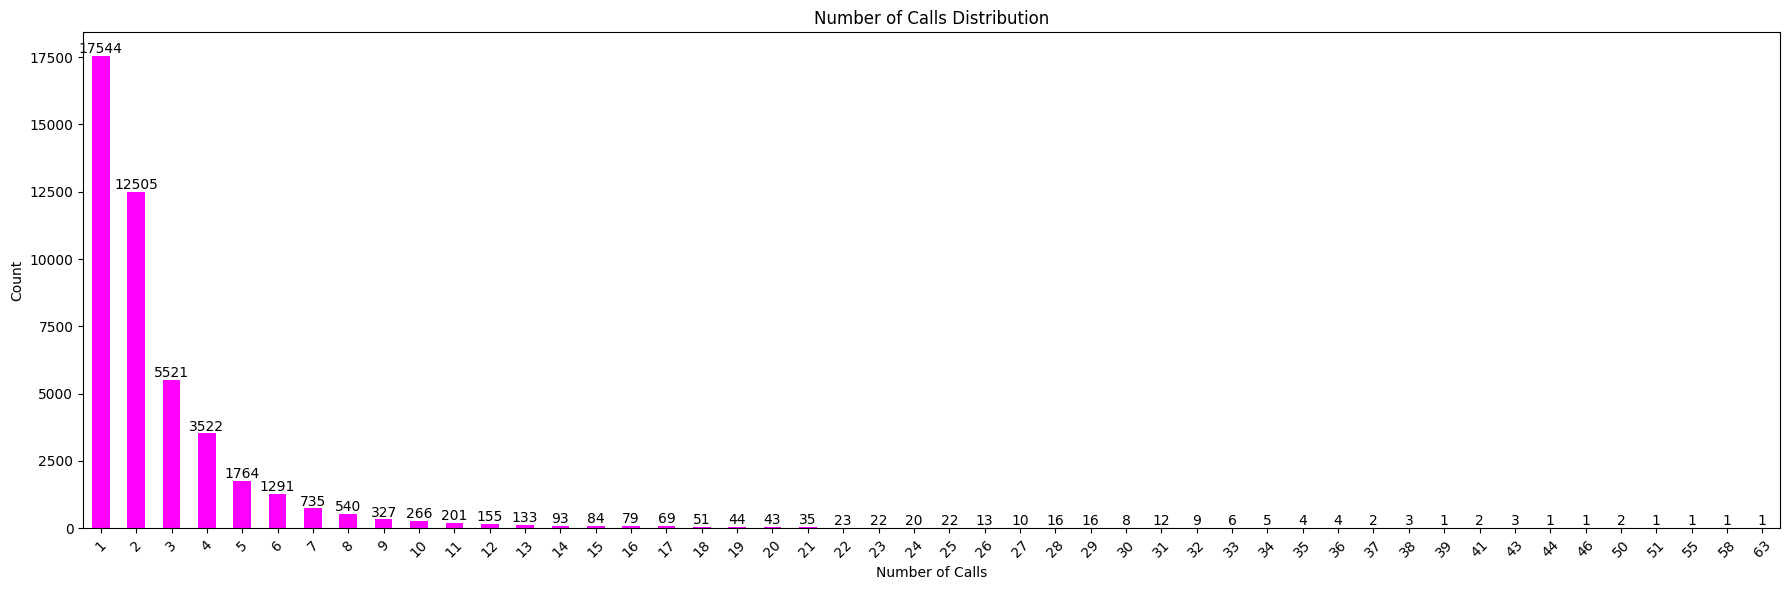

In [16]:
plt.figure(figsize=(18, 6))

# Number of campaign call bar chart.
call_bar = df['campaign'].value_counts().sort_index().plot(kind='bar', color='magenta')

plt.title('Number of Calls Distribution')
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show each bar value.
for c in call_bar.patches:
    call_bar.annotate(str(c.get_height()), (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

The visualization above shows the distribution of the number of calls made by the Portuguese Bank Telemarketing Team to clients over a period of **1 year**. The graph results may indicate the success or failure of their calling efforts.

There is also a possibility that each individual in the Telemarketing Team limits their maximum calling efforts. For example, person X may limit the maximum number of calls to client Y to 30 calls per year. If this limit is reached **and** there is no response, X would then label it as `unknown` in their CRM system. This is a common practice among sales teams across all industries.

### D. Previous Campaign Result

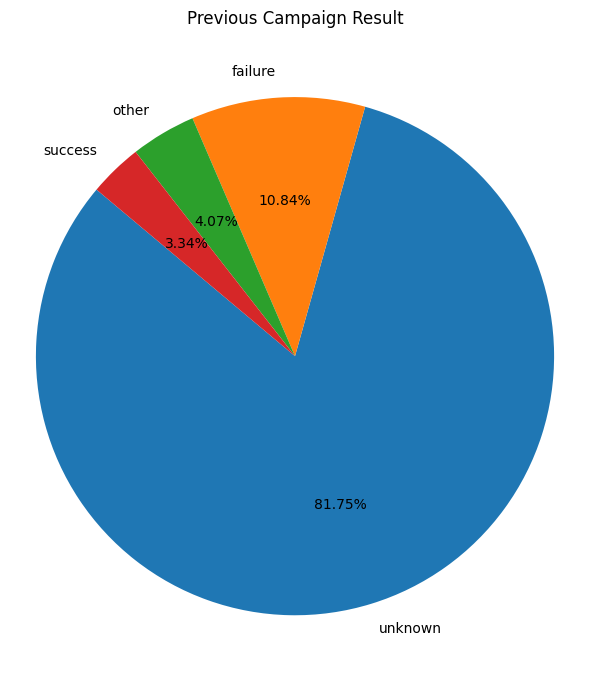

In [17]:
pc_counts = df['poutcome'].value_counts()

# Previous campaign pie-chart plotting.
plt.figure(figsize=(6, 7))
pie_chart_pc = plt.pie(pc_counts, labels=pc_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Previous Campaign Result')
plt.axis('equal')
plt.tight_layout()
plt.show()

The Pie Chart above shows the results of previous campaigns for different services/products, with the majority of outcomes labeled as `unknown`. This could possibly occur due to:

* Calls not being answered by clients,
* Numbers being unreachable by the Telemarketing Team,
* Telemarketing calls being blocked by clients,
* Clients not yet being contacted by Telemarketing.

As a result, they update the status in their CRM system to `unknown`.

## Correlation between Feature and Target

Because I want to display a heatmap correlation graph, I need to temporarily change the data type of the target column `df['y']`. I'll encode the target using the pandas `get_dummies` function and save it into `df_dummy`. The actual target encoding will be performed during the **feature engineering** process using `LabelEncoder`.

In [18]:
# Create dummy dataset.
df_dummy = pd.get_dummies(df, columns=['y'], drop_first=True, dtype=int)

df_dummy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### A. Numerical Columns

At this stage, I'm viewing the Spearman correlation heatmap (assuming there are still outliers) for the numerical columns and the target column `df_dummy['y_yes']`.

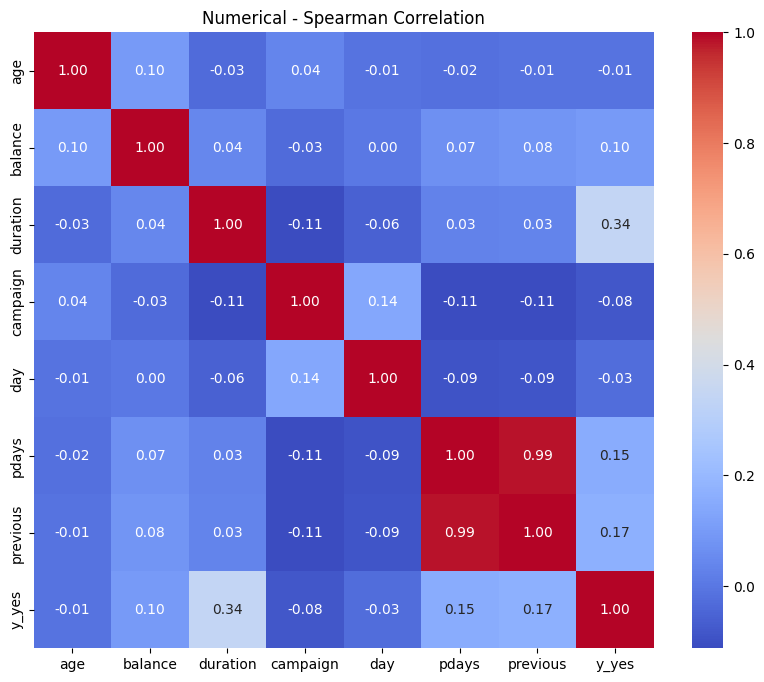

In [19]:
df_num = df_dummy[['age', 'balance', 'duration', 'campaign', 'day', 'pdays', 'previous', 'y_yes']]

plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numerical - Spearman Correlation")

plt.show()

Based on the Spearman correlation analysis above, I've determined a correlation threshold of `|0.05|`. The features that show correlation with the target `y_yes` are:

| Column | Description | Spearman Correlation | Correlation Reason |
| --- | --- | --- | --- |
| `balance` | Average yearly balance per client (€) | 0.1 | Clients view deposits as a non-primary need, prioritizing personal/family needs first before considering deposits when they have surplus funds. Hence, correlation between balance amount and willingness to make deposits makes sense. |
| `duration` | Duration of the last contact (seconds) | 0.34 | In sales, the duration of communication with a client often correlates linearly with their interest in the offered product. |
| `campaign` | Number of contacts performed during the current campaign | -0.08 | Shows a negative correlation with client willingness to make deposits. This could be because a high number of calls within a year might indicate that clients are not receptive to telemarketing efforts, potentially due to call rejections or being categorized as `unknown` in the CRM system. |
| `pdays` | Number of days since the client was last contacted from a previous campaign | 0.15 | Indicates that there might already be a relationship established between the client and the team during the previous campaign period, leading to trust and openness to new offers in subsequent campaigns, such as deposit services. |
| `previous` | Number of contacts performed before the current campaign | 0.17 | Similar to `pdays`, when clients have an existing relationship and trust with the telemarketing team, they tend to be more receptive to new offers in subsequent campaigns, such as deposit services. |

I will use the results of this correlation analysis as a reference for feature selection during the feature engineering stage.

### B. Categorical Columns

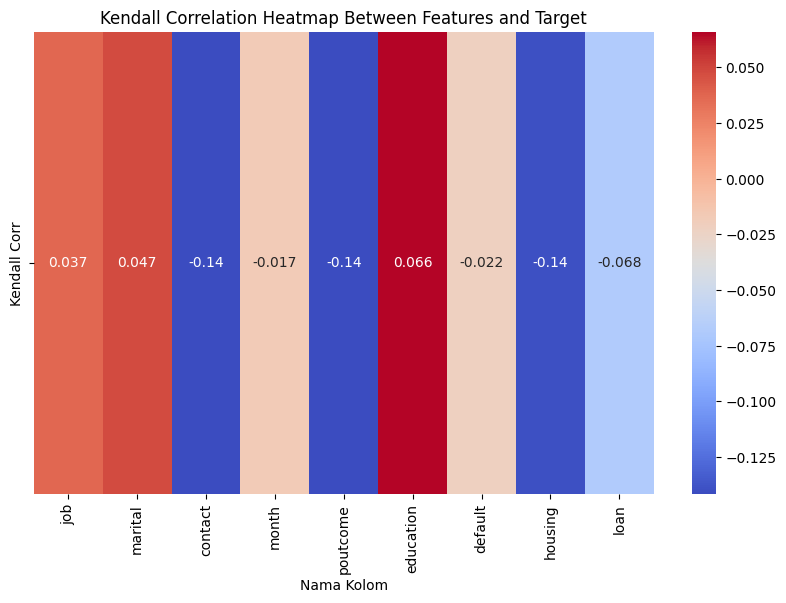

In [20]:
df_cat = df_dummy[['job', 'marital', 'contact', 'month', 'poutcome', 'education', 'default', 'housing', 'loan']]
cols_1 = []
corr_1 = []
pval_1 = []

for col in df_cat.columns:
    corr_coef, p_value = kendalltau(df_cat[col], df_dummy['y_yes'])
    cols_1.append(col)
    corr_1.append(corr_coef)
    pval_1.append(p_value)

# Create dataframe.
corr_df = pd.DataFrame({'Nama Kolom': cols_1, 'Kendall Corr': corr_1, 'P-value': pval_1})

# Create heatmap correlation from dataframe corr_df.
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.set_index('Nama Kolom')[['Kendall Corr']].T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Kendall Correlation Heatmap Between Features and Target')
plt.show()

Based on the Kendall correlation analysis above, I've set a correlation threshold of `|0.035|`. The features that show correlation with the target `y_yes` are:

| Column | Kendall Correlation | Description | Correlation Reason |
| --- | --- | --- | --- |
| `job` | 0.037 | Client's job type | When clients are willing to make deposits, it closely relates to their **financial capability**. This is also supported by the Spearman correlation analysis indicating that balance amount correlates linearly with the willingness to make deposits. |
| `marital` | 0.047 | Client's marital status | The correlation between marital status and the willingness to make deposits shows that clients feel responsible for their family or loved ones. Therefore, they are willing to invest in term deposits to **secure** their hard-earned income. |
| `education` | 0.066 | Client's education level | The correlation between education level and the willingness to make deposits not only reflects financial capability but also indicates **financial literacy**. Educated individuals tend to have a better understanding of financial literacy and are more inclined to invest in term deposits. |
| `contact` | -0.14 | Type of communication with the client | Shows a negative correlation with the willingness of clients to make deposits. When communication type is `unknown`, it likely means the client has **not been contacted** by the telemarketing team, resulting in CRM output indicating they are not interested in deposits. |
| `housing` | -0.14 | Whether the client has a housing loan | Shows a negative correlation with the willingness of clients to make deposits. Clients who already have a housing loan tend to be reluctant to make deposits due to existing financial burdens and prioritize these commitments first. |
| `loan` | -0.068 | Whether the client has a personal loan | Shows a negative correlation with the willingness of clients to make deposits. Similar to housing loans, clients prioritize loan payments, potentially disrupting their cash flow, and may avoid making deposits. |
| `poutcome` | -0.14 | Outcome of previous marketing campaign efforts | Shows a negative correlation with the willingness of clients to make deposits. When the outcome is `unknown`, it suggests the client was either **not contacted** or contacted incorrectly by the telemarketing team. Alternatively, if there was no interaction or interest in previous marketing campaigns, clients may simply view the bank as a **"wallet"** for daily needs, showing no interest in other services offered by the marketing team.

I will use the results of this correlation analysis as a reference for feature selection during the feature engineering stage.

## Target Proportion

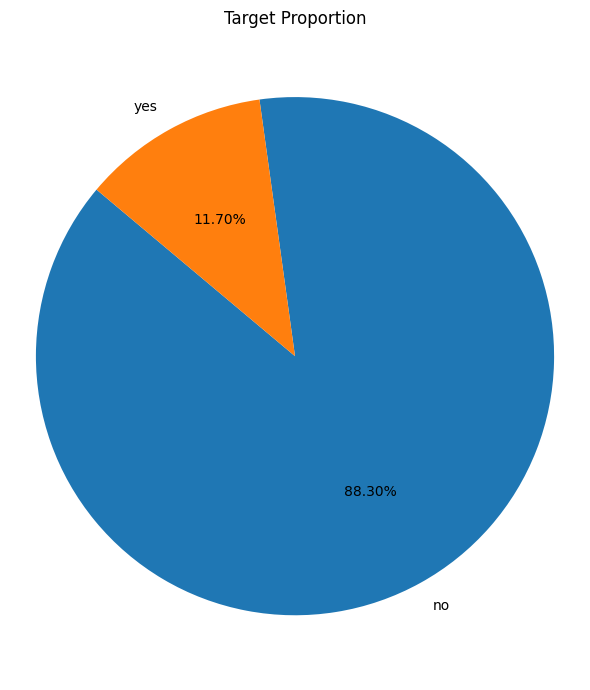

In [21]:
y_count = df['y'].value_counts()

# Target pie-chart plotting.
plt.figure(figsize=(6, 7))
pie_chart_y = plt.pie(y_count, labels=y_count.index, autopct='%2.2f%%', startangle=140)
plt.title('Target Proportion')
plt.axis('equal')
plt.tight_layout()
plt.show()

It appears that the results of the term deposit campaign by the telemarketing team at Bank Portugis over the past year show a significant majority of rejections, with a dominant value of 88%. Insights gained from the data exploration process should serve as valuable references for future evaluations and guidance for the telemarketing team moving forward.

# 3. Feature Engineering

## A. Handling Value

In this program, I will perform **data modification/deletion** before proceeding to the `Feature Engineering` process, for the following reasons:

1. Some categorical columns have `unknown` values, although there are no missing values in this dataset. However, the presence of `unknown` values can lead to confusion in data interpretation and modeling. To ensure good interpretation quality, I will delete rows with `unknown` values in administrative information columns such as `job` and `education`.

2. Model training efficiency can be improved by reducing the size of the large dataset (`45,211 entries`). By deleting this data, the dataset size used for classification modeling can be reduced.

3. Client administrative data from Bank Portugis should already have valid values for administrative purposes. However, due to limited information about the original data source, I will delete data with `unknown` values in `job` and `education` columns.

4. Although there are `unknown` values in the `contact` and `poutcome` columns, these columns are the result of telemarketing efforts and should retain their authenticity. Therefore, I will leave `unknown` values as they are.

5. During EDA analysis, a naming error was found in the `job` column for the value `admin.`, which should be corrected to `admin` for data consistency.

Therefore, I will make necessary data modifications to ensure data quality and consistency before proceeding to the next stage.

### Typo Handling

In [22]:
# Typo correction of 'admin.'.
df['job'] = df['job'].replace('admin.', 'admin')

df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In the `job` column, there are no more typos in the naming of the value `admin`.

### Drop Unknown Value

Based on the analysis and reasons I mentioned earlier, I will proceed with removing the `unknown` values from the administrative information columns, namely the `job` and `education` columns.

In [23]:
# Before unknown value drop
df.shape

(45211, 17)

In [24]:
df = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]

In [25]:
df['job'].value_counts()

job
blue-collar      9278
management       9216
technician       7355
admin            5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: count, dtype: int64

In [26]:
df['education'].value_counts()

education
secondary    23131
tertiary     13262
primary       6800
Name: count, dtype: int64

In [27]:
# After drop.
df.shape

(43193, 17)

In [28]:
df['y'].value_counts()

y
no     38172
yes     5021
Name: count, dtype: int64

The data has been successfully cleaned, resulting in a total reduction of `2,018` entries, with a target proportion of `38,172` for `no` and `5,021` for `yes`. Next, I will proceed with the `Data Inference Saving` process and save it to `data_inf.csv`. This dataset will be used for modeling in `inference.ipynb` and for feature selection based on the EDA and feature importance analysis results.

## B. Data Inference Saving

Taking 5% of `df` and saving it to `data_inf.csv` for testing the best model in `inference.ipynb`.

In [29]:
sample_size = int(len(df) * 0.05)

# Took randomly 5% of data for inference.
df_inf = df.sample(sample_size, random_state=28)

# Delete data inference index from main dataframe.
df = df.drop(df_inf.index)

# Save to data_inf.csv, the data inference test is in `inference.ipynb`.
df_inf.to_csv('data_inf.csv', index=False)

print(df_inf.shape)
df_inf.head()

(2159, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5513,34,admin,married,secondary,no,1049,yes,no,unknown,23,may,25,14,-1,0,unknown,no
16955,34,blue-collar,married,secondary,no,765,no,no,cellular,25,jul,238,1,-1,0,unknown,no
19492,58,unemployed,married,secondary,no,2690,no,no,cellular,7,aug,142,2,-1,0,unknown,no
16859,28,housemaid,married,secondary,no,15,yes,no,telephone,25,jul,133,7,-1,0,unknown,no
44992,38,management,married,tertiary,no,1257,no,no,cellular,12,oct,166,1,-1,0,unknown,no


In [30]:
df_inf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [31]:
# Current main dataframe shape.
df.shape

(41034, 17)

Data Inference has been successfully saved to `data_inf.csv`, containing `2,159` rows with no missing values. The main dataset `df` now retains `41,034` entries.

## C. Feature Selection

Based on the previous EDA results regarding correlation tests, it was concluded that the columns `age`, `day`, `month`, and `default` do not exhibit significant correlation with the classification target. Therefore, I will proceed to drop these columns.

In [32]:
df = df.drop(columns=['age', 'day', 'month', 'default'])
df.head()

,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,technician,single,secondary,29,yes,no,unknown,151,1,-1,0,unknown,no
2,entrepreneur,married,secondary,2,yes,yes,unknown,76,1,-1,0,unknown,no
5,management,married,tertiary,231,yes,no,unknown,139,1,-1,0,unknown,no
6,management,single,tertiary,447,yes,yes,unknown,217,1,-1,0,unknown,no


In [33]:
df['y'].value_counts()

y
no     36253
yes     4781
Name: count, dtype: int64

## D. Data Split

Performing the separation of training and testing data, along with separating each feature and its target.

In [34]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

X_train.head()

,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
3108,blue-collar,married,primary,-101,yes,no,unknown,122,4,-1,0,unknown
24329,management,divorced,tertiary,0,no,no,cellular,107,1,-1,0,unknown
26818,blue-collar,divorced,primary,1480,yes,no,cellular,95,2,-1,0,unknown
44312,admin,married,secondary,0,no,no,cellular,496,2,182,11,success
36491,technician,divorced,secondary,16,yes,no,telephone,34,12,347,5,other


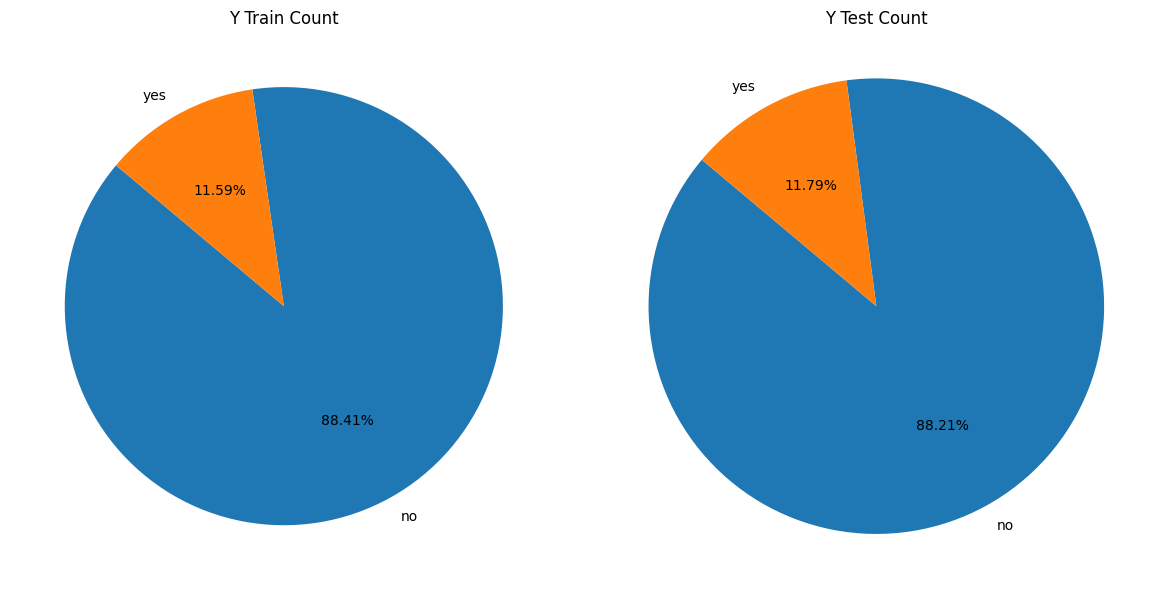

In [35]:
y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(y_train_counts, labels=y_train_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Y Train Count')

plt.subplot(1, 2, 2)
plt.pie(y_test_counts, labels=y_test_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Y Test Count')

plt.axis('equal')
plt.tight_layout()
plt.show()

If we look at the results above, indeed the target variable is unbalanced, with the `no` class being dominant at `88%`. However, I will **not** perform data balancing in this program. After attempting data balancing, the results were not favorable. There was a significant difference of more than 40% in the F1 scores between the test and train data, where the train data performed much better, indicating inconsistency. I will further explain this in the **analysis of model comparison results**.

## E. Outlier Handling

In [36]:
# Filtering numerical columns in X_train.
Xtrain_num_col = X_train.select_dtypes(include=['number']).columns

# Skewness.
Xtrain_skew_list = []
for col in Xtrain_num_col:
    Xtrain_skew_list.append([col, X_train[col].skew()])

# Create skewness dataframe.
skewness_X_train = pd.DataFrame(columns=['Kolom', 'Skewness'], data=Xtrain_skew_list)

skewness_X_train

,Kolom,Skewness
0,balance,8.708360
1,duration,3.254537
2,campaign,4.810870
3,pdays,2.624806
4,previous,7.611212


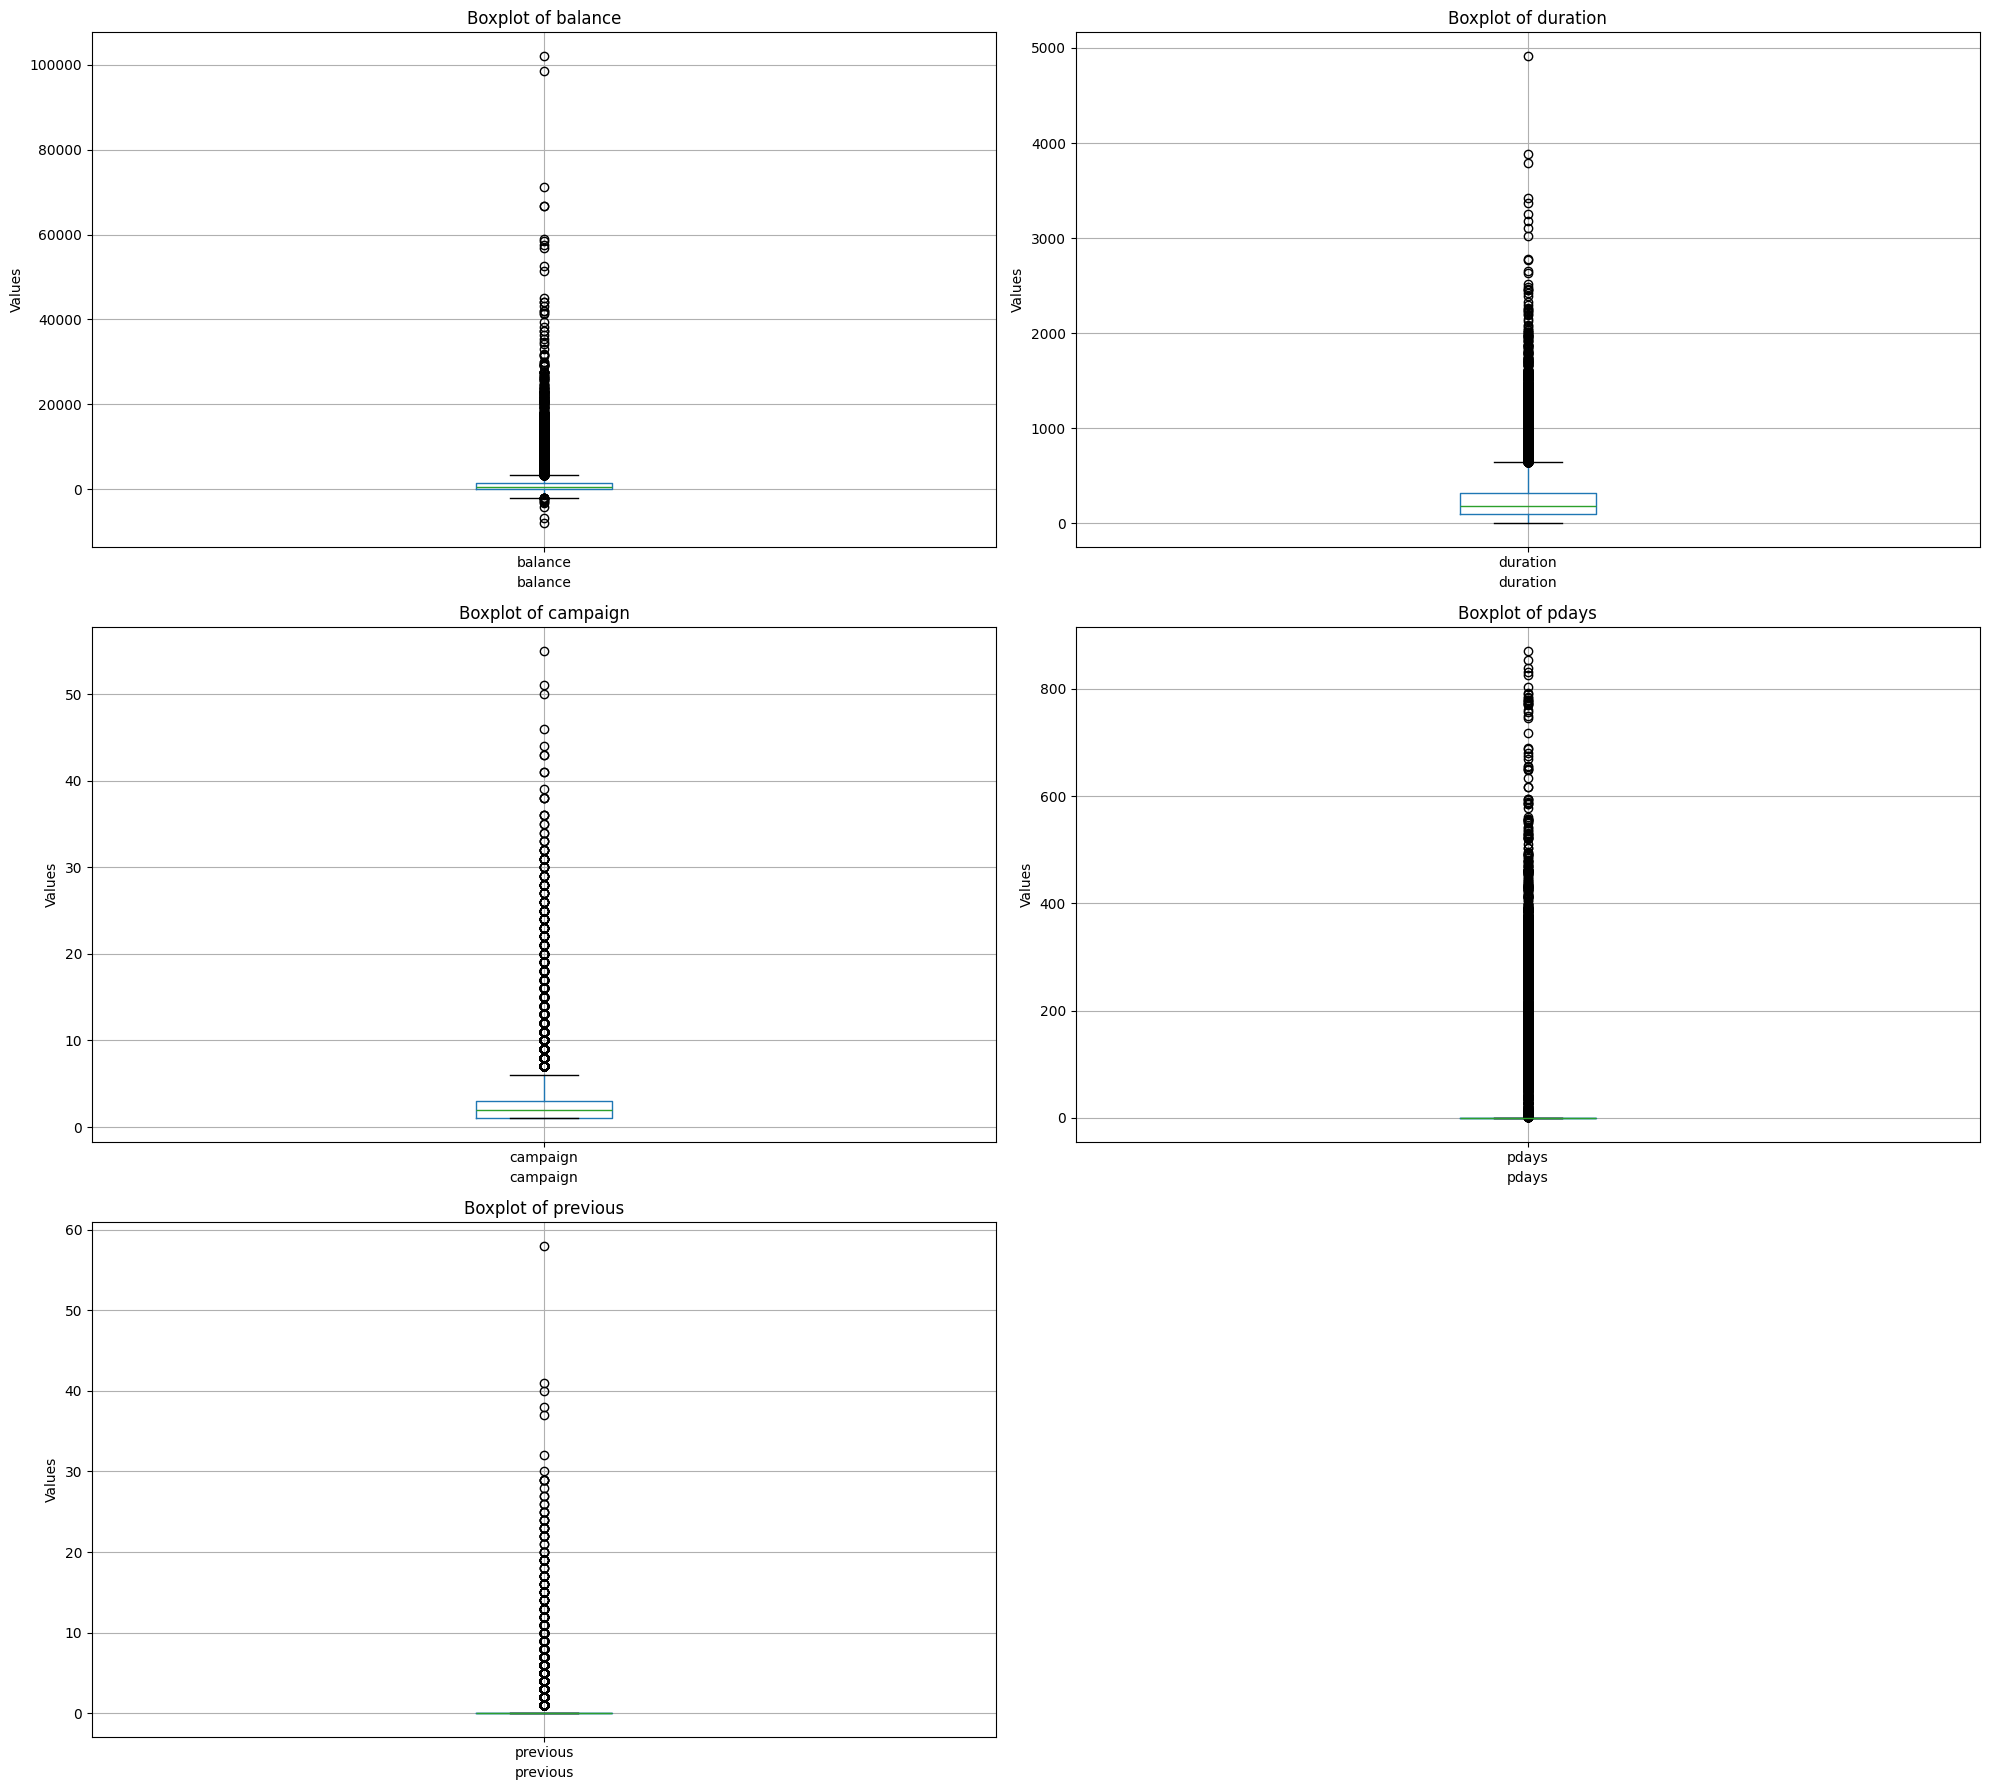

In [37]:
X_train_num = X_train.select_dtypes(include=['number'])

# Number of columns in a plot.
num_cols = len(X_train_num.columns)
# Number of rows in a plot.
cols_per_row = 2

# Calculate the number of rows needed.
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  

# Setting up the display of subplots.
plt.figure(figsize=(10 * cols_per_row, 6 * num_rows))

for i, col in enumerate(X_train_num.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    X_train_num.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [38]:
# Creating a function to calculate the percentage of outlier values.
def outliers_percentage(series, threshold=3):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers / len(series) * 100

# Initializing a column containing lists.
cols = []
outliers_percentages = []

# Calculating the percentage of outliers using a loop function.
for col in X_train_num.columns:
    cols.append(col)
    outliers_percentages.append(outliers_percentage(X_train_num[col]))

# Create outliers dataframe.
outliers = pd.DataFrame({
    'Nama Kolom': cols,
    'Outlier Percentage': [f"{int(round(percent))}%" for percent in outliers_percentages]
})

outliers

,Nama Kolom,Outlier Percentage
0,balance,5%
1,duration,3%
2,campaign,3%
3,pdays,18%
4,previous,18%


Although there are outlier values in the columns `balance` (5%), `duration` (3%), `campaign` (3%), `pdays` (18%), and `previous` (18%), I have decided **not to handle outliers** to maintain **marketing data integrity**. This is because the data is a **report result** from the Telemarketing Team of the Portuguese Bank, which will also be used for team performance evaluation. Moreover, this data is from the banking industry where the authenticity of numeric metrics can play a crucial role in data analysis.

# 4. Machine Learning with Pipeline

## A. Data Preprocessing

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28723 entries, 3108 to 4576
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        28723 non-null  object
 1   marital    28723 non-null  object
 2   education  28723 non-null  object
 3   balance    28723 non-null  int64 
 4   housing    28723 non-null  object
 5   loan       28723 non-null  object
 6   contact    28723 non-null  object
 7   duration   28723 non-null  int64 
 8   campaign   28723 non-null  int64 
 9   pdays      28723 non-null  int64 
 10  previous   28723 non-null  int64 
 11  poutcome   28723 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.8+ MB


In [40]:
X_train.columns

Index(['job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [41]:
# Identifying columns to be used in the pipeline.
num_features = ['balance', 'duration', 'campaign', 'pdays', 'previous']
cat_features = ['job', 'marital', 'contact', 'poutcome', 'housing', 'loan']
cat_ordinal_feature = ['education']


### Target Encode

Since the target in the dataset has binary values (yes/no), at this stage, encoding will be performed on the target using `LabelEncoder`.

In [42]:
# Performing encoding on the target with binary values (yes/no).
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### Preprocessing with Pipeline

Creating a pipeline for the `ColumnTransformer` preprocessing process, where I use `MinMaxScaler` for normalization, `OrdinalEncoder` for ordinal data, and `OneHotEncoder` for categorical data. The reason I chose `MinMaxScaler` is not only because the data is not normally distributed but also because it produces better results compared to when I experimented with `RobustScaler`. When I experimented with `RobustScaler`, it resulted in very poor outcomes, such as an SVM F1-score of 0.02.

In [43]:
# Creating a pipeline for preprocessing `num_features` with RobustScaler (due to the presence of outliers).
num_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

# Creating a pipeline for preprocessing `cat_ordinal_feature` with OrdinalEncoder.
ordinal_transformer = Pipeline([
    ('ode', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]))
])

# Creating a pipeline for preprocessing `cat_features` with OneHotEncoder. 
cat_transformer = Pipeline([
    ('oh', OneHotEncoder(handle_unknown='ignore'))
])


# Performing the combination of preprocessing on the dataset according to each respective preprocessing pipeline.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('ord', ordinal_transformer, cat_ordinal_feature),
        ('cat', cat_transformer, cat_features)
    ])

## B. Classification Modeling with Pipeline

At this stage, I will create pipelines with preprocessing steps followed by classification using each modeling algorithm (KNN, SVM, Decision Tree, Random Forest, XGB).

In [44]:
# KNN Pipeline.
pipe_knn = Pipeline([
('preprocessor_knn', preprocessor),
('classifier_knn', KNeighborsClassifier())
])

# SVM Pipeline.
pipe_svm = Pipeline([
('preprocessor_svm', preprocessor),
('classifier_svm', SVC())
])

# Decission Tree Pipeline.
pipe_dt = Pipeline([
('preprocessor_dt', preprocessor),
('classifier_dt', DecisionTreeClassifier())
])

# Random Forest Pipeline.
pipe_rf = Pipeline([
('preprocessor_rf', preprocessor),
('classifier_rf', RandomForestClassifier())
])

# XGBoost Pipeline.
pipe_xgb = Pipeline([
('preprocessor_xgb', preprocessor),
('classifier_xgb', XGBClassifier())
])

# 5. Base Model Evaluation

Performing training on the training data, predicting on the test data, and evaluating metrics for analysis results. Modeling is done using pipelines for each algorithm: KNN, SVM, Decision Tree, Random Forest, and XGB.

### KNN Base Model

In [45]:
pipe_knn.fit(X_train, y_train_encoded)
print('KNN Training Score: ',round(pipe_knn.score(X_train, y_train_encoded),4))
print('KNN Testing Score: ', round(pipe_knn.score(X_test, y_test_encoded),4))

KNN Training Score:  0.9163
KNN Testing Score:  0.8867


In the base KNN model, there is a significant accuracy difference of `2.96%`, although it shows slight overfitting.

In [46]:
y_knn_pred = pipe_knn.predict(X_test)

In [47]:
print("KNN CLASSIFICATION REPORT")
target = ['No', 'Yes']
print(classification_report(y_test_encoded, y_knn_pred, target_names = target))

KNN CLASSIFICATION REPORT
              precision    recall  f1-score   support

          No       0.91      0.97      0.94     10859
         Yes       0.54      0.30      0.38      1452

    accuracy                           0.89     12311
   macro avg       0.72      0.63      0.66     12311
weighted avg       0.87      0.89      0.87     12311



From the difference in F1 scores, it appears that this dataset is not well predicted using KNN due to its data imbalance.

In [48]:
# KNN Base Model Cross Validation

f1_train_cross_val_knn = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train_encoded,
                                     cv=5,
                                     scoring="f1")

print('KNN F1 Score - All - Cross Validation  : ', f1_train_cross_val_knn)
print('KNN F1 Score - Mean - Cross Validation : ', f1_train_cross_val_knn.mean())
print('KNN F1 Score - Std - Cross Validation  : ', f1_train_cross_val_knn.std())
print('KNN F1 Score - Range of Test-Set       : ', (f1_train_cross_val_knn.mean()-f1_train_cross_val_knn.std()) , '-', (f1_train_cross_val_knn.mean()+f1_train_cross_val_knn.std()))

KNN F1 Score - All - Cross Validation  :  [0.41035475 0.40237859 0.35849057 0.40648855 0.38512869]
KNN F1 Score - Mean - Cross Validation :  0.3925682296483116
KNN F1 Score - Std - Cross Validation  :  0.019094567498522265
KNN F1 Score - Range of Test-Set       :  0.37347366214978933 - 0.4116627971468339


The average F1 score on the training data using KNN is `39.26%`.

### SVM Base Model

In [49]:
pipe_svm.fit(X_train, y_train_encoded)
print('SVM Training Score: ',round(pipe_svm.score(X_train, y_train_encoded),4))
print('SVM Testing Score: ', round(pipe_svm.score(X_test, y_test_encoded),4))

SVM Training Score:  0.8943
SVM Testing Score:  0.8916


In the base SVM model, there is a very slight accuracy difference of `0.27%`, indicating consistent performance.

In [50]:
y_svm_pred = pipe_svm.predict(X_test)

In [51]:
print("SVM CLASSIFICATION REPORT")
target = ['No', 'Yes']
print(classification_report(y_test_encoded, y_svm_pred, target_names = target))

SVM CLASSIFICATION REPORT
              precision    recall  f1-score   support

          No       0.90      0.99      0.94     10859
         Yes       0.65      0.18      0.28      1452

    accuracy                           0.89     12311
   macro avg       0.77      0.58      0.61     12311
weighted avg       0.87      0.89      0.86     12311



In [52]:
# SVM Base Model Cross Validation

f1_train_cross_val_svm = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train_encoded,
                                     cv=5,
                                     scoring="f1")

print('SVM F1 Score - All - Cross Validation  : ', f1_train_cross_val_svm)
print('SVM F1 Score - Mean - Cross Validation : ', f1_train_cross_val_svm.mean())
print('SVM F1 Score - Std - Cross Validation  : ', f1_train_cross_val_svm.std())
print('SVM F1 Score - Range of Test-Set       : ', (f1_train_cross_val_svm.mean()-f1_train_cross_val_svm.std()) , '-', (f1_train_cross_val_svm.mean()+f1_train_cross_val_svm.std()))

SVM F1 Score - All - Cross Validation  :  [0.29647059 0.27817746 0.27046263 0.30309989 0.26218097]
SVM F1 Score - Mean - Cross Validation :  0.282078307877644
SVM F1 Score - Std - Cross Validation  :  0.015460199512662823
SVM F1 Score - Range of Test-Set       :  0.2666181083649812 - 0.2975385073903068


The average F1 score on the training data using SVM is only `28.2%`.

### Decision Tree Base Model

In [53]:
pipe_dt.fit(X_train, y_train_encoded)
print('DT Training Score: ',round(pipe_dt.score(X_train, y_train_encoded),4))
print('DT Testing Score: ', round(pipe_dt.score(X_test, y_test_encoded),4))

DT Training Score:  1.0
DT Testing Score:  0.8583


In the base Decision Tree model, there is a significant accuracy difference of `14.17%`, indicating extreme overfitting of the data.

In [54]:
y_dt_pred = pipe_dt.predict(X_test)

In [55]:
print("DT CLASSIFICATION REPORT")
target = ['No', 'Yes']
print(classification_report(y_test_encoded, y_dt_pred, target_names = target))

DT CLASSIFICATION REPORT
              precision    recall  f1-score   support

          No       0.92      0.92      0.92     10859
         Yes       0.41      0.43      0.42      1452

    accuracy                           0.86     12311
   macro avg       0.66      0.67      0.67     12311
weighted avg       0.86      0.86      0.86     12311



In [56]:
# DT Base Model Cross Validation

f1_train_cross_val_dt = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train_encoded,
                                     cv=5,
                                     scoring="f1")

print('DT F1 Score - All - Cross Validation  : ', f1_train_cross_val_dt)
print('DT F1 Score - Mean - Cross Validation : ', f1_train_cross_val_dt.mean())
print('DT F1 Score - Std - Cross Validation  : ', f1_train_cross_val_dt.std())
print('DT F1 Score - Range of Test-Set       : ', (f1_train_cross_val_dt.mean()-f1_train_cross_val_dt.std()) , '-', (f1_train_cross_val_dt.mean()+f1_train_cross_val_dt.std()))

DT F1 Score - All - Cross Validation  :  [0.42419716 0.40500736 0.41975309 0.41846612 0.41966251]
DT F1 Score - Mean - Cross Validation :  0.417417248409531
DT F1 Score - Std - Cross Validation  :  0.006504920197926937
DT F1 Score - Range of Test-Set       :  0.41091232821160406 - 0.4239221686074579


The average F1 score on the training data using Decision Tree is only `41.74%`.

### Random Forest Base Model

In [57]:
pipe_rf.fit(X_train, y_train_encoded)
print('RF Training Score: ',round(pipe_rf.score(X_train, y_train_encoded),4))
print('RF Testing Score: ', round(pipe_rf.score(X_test, y_test_encoded),4))

RF Training Score:  0.9999
RF Testing Score:  0.8959


In the base Random Forest model, there is a significant accuracy difference of `10.3%`, indicating some degree of overfitting.

In [58]:
y_rf_pred = pipe_rf.predict(X_test)

In [59]:
print("RF CLASSIFICATION REPORT")
target = ['No', 'Yes']
print(classification_report(y_test_encoded, y_rf_pred, target_names = target))

RF CLASSIFICATION REPORT
              precision    recall  f1-score   support

          No       0.92      0.97      0.94     10859
         Yes       0.60      0.35      0.45      1452

    accuracy                           0.90     12311
   macro avg       0.76      0.66      0.69     12311
weighted avg       0.88      0.90      0.88     12311



In [60]:
# RF Base Model Cross Validation

f1_train_cross_val_rf = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train_encoded,
                                     cv=5,
                                     scoring="f1")

print('RF F1 Score - All - Cross Validation  : ', f1_train_cross_val_rf)
print('RF F1 Score - Mean - Cross Validation : ', f1_train_cross_val_rf.mean())
print('RF F1 Score - Std - Cross Validation  : ', f1_train_cross_val_rf.std())
print('RF F1 Score - Range of Test-Set       : ', (f1_train_cross_val_rf.mean()-f1_train_cross_val_rf.std()) , '-', (f1_train_cross_val_rf.mean()+f1_train_cross_val_rf.std()))

RF F1 Score - All - Cross Validation  :  [0.45437262 0.45402299 0.4330855  0.46516008 0.46153846]
RF F1 Score - Mean - Cross Validation :  0.4536359301613312
RF F1 Score - Std - Cross Validation  :  0.01111996905383884
RF F1 Score - Range of Test-Set       :  0.44251596110749236 - 0.46475589921517


The average F1 score on the training data using Random Forest is only `45.36%`.

### XGB Base Model

In [61]:
pipe_xgb.fit(X_train, y_train_encoded)
print('XGB Training Score: ',round(pipe_xgb.score(X_train, y_train_encoded),4))
print('XGB Testing Score: ', round(pipe_xgb.score(X_test, y_test_encoded),4))

XGB Training Score:  0.9397
XGB Testing Score:  0.9001


In the base XGB model, there is a decent accuracy difference of `3.96%`, and it shows slight overfitting.

In [62]:
y_xgb_pred = pipe_xgb.predict(X_test)

In [63]:
print("XGB CLASSIFICATION REPORT")
target = ['No', 'Yes']
print(classification_report(y_test_encoded, y_xgb_pred, target_names = target))

XGB CLASSIFICATION REPORT
              precision    recall  f1-score   support

          No       0.92      0.97      0.94     10859
         Yes       0.62      0.39      0.48      1452

    accuracy                           0.90     12311
   macro avg       0.77      0.68      0.71     12311
weighted avg       0.89      0.90      0.89     12311



In [64]:
# XGB Base Model Cross Validation

f1_train_cross_val_xgb = cross_val_score(pipe_xgb,
                                     X_train,
                                     y_train_encoded,
                                     cv=5,
                                     scoring="f1")

print('XGB F1 Score - All - Cross Validation  : ', f1_train_cross_val_xgb)
print('XGB F1 Score - Mean - Cross Validation : ', f1_train_cross_val_xgb.mean())
print('XGB F1 Score - Std - Cross Validation  : ', f1_train_cross_val_xgb.std())
print('XGB F1 Score - Range of Test-Set       : ', (f1_train_cross_val_xgb.mean()-f1_train_cross_val_xgb.std()) , '-', (f1_train_cross_val_xgb.mean()+f1_train_cross_val_xgb.std()))

XGB F1 Score - All - Cross Validation  :  [0.45751634 0.44528302 0.46536412 0.47199265 0.47696477]
XGB F1 Score - Mean - Cross Validation :  0.4634241805954531
XGB F1 Score - Std - Cross Validation  :  0.011176170935702185
XGB F1 Score - Range of Test-Set       :  0.4522480096597509 - 0.47460035153115526


The average F1 score on the training data using XGB is `46.34%`. This result is quite good, and so far, XGB appears to be the strongest candidate compared to other base models. I'll explain further in the next steps.

## Base Model Comparison

In [65]:
models = {
    'KNN' : pipe_knn,
    'SVM' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test_encoded, models[model].predict(X_test))

In [66]:
df_model

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,0.886687,0.891642,0.858338,0.895865,0.900089
F1-Score,0.380826,0.278139,0.417112,0.445022,0.481887


In [67]:
models = {
    'KNN' : pipe_knn,
    'SVM' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train_encoded, cv = 5, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train_encoded, cv = 5, scoring='f1').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [68]:
df_cross_val

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Mean,0.463424,0.463424,0.463424,0.463424,0.463424
Std,0.011176,0.011176,0.011176,0.011176,0.011176


### Base Model Evaluation Summary

Based on my previous explanation, in addition to this program, **I have previously attempted data balancing** on the dataset, and the results were not satisfactory/consistent (overly well-trained on the training data, with a significant difference in F1 scores compared to the test data), as shown in the table below.

#### **With** Data Balancing

|                            | KNN      | SVM      | Decision Tree | Random Forest | XGBoost  |
|----------------------------|----------|----------|---------------|---------------|----------|
| Train Accuracy              | 92.34% | 84.58% | 100% | 100% | 93.04% |
| Test Accuracy               | 80.98% | 81.66% | 83.19%  | 86.51%  | 86.47% |
| Train F1-Score Mean         | 89.87% | 89.87% | 89.87% | 89.87% | 89.87% |
| Test F1-Score               | 44.19% | 49.66%  | 41.78%  | 49.803%  | 52.07% |
| **Accuracy Difference** | 11.36% | 2.92% | 16.81% | 13.49% | 6.57% | 
| **Difference in F1 Mean** | 45.68% | 40.21% | 48.09% | 40.067% | 37.80% |

Where the F1-Score on the test data is significantly lower (>40%) than the average F1-Score on the training data. Therefore, I decided **not** to perform data balancing in this program. Below is a summary of the results from the base model experiments.

#### **Without** Data Balancing

|                            | KNN      | SVM      | Decision Tree | Random Forest | XGBoost  |
|----------------------------|----------|----------|---------------|---------------|----------|
| Train Accuracy              | 91.63% | 89.43% | 100% | 99.9% | 93.97% |
| Test Accuracy               | 88.67% | 89.16% | 85.83%  | 89.59%  | 90.01% |
| Train F1-Score Mean         | 46.34% | 46.34% | 46.34%  | 46.34%  | 46.34% |
| Test F1-Score               | 38.1% | 27.81%  | 41.71%  | 44.5%  | 48.19% |
| **Accuracy Difference**         | 2.96% | 0.27% | 14.17% | 10.31% | 3.96% |
| **Difference in F1 Mean**       | 8.24% | 18.53% | 4.63% | 1.84% | 1.85% |

From the experimentation with base models (KNN, SVM, Decision Tree, Random Forest, and XGB) on the dataset, it is concluded that the classification modeling using the `XGB` algorithm performs the **best** (whether with or without data balancing). In the experiments with base models on the dataset **without** data balancing, the difference in accuracy between training and test data using `XGB` is `3.96%`, and the difference in F1-Score from the average is `1.85%`. Although there is slight overfitting observed, the next step will involve **hyperparameter tuning** of the `XGB` algorithm using `GridSearch`, with my primary goal being **to reduce overfitting**.

# 6. Best Model GridSearch

In this stage, I am performing hyperparameter tuning using `GridSearchCV` and evaluating the XGB model's prediction metrics with the best parameters. Since my focus is on **reducing** overfitting, the parameters I am experimenting with are:

* `max_depth` (default=6): The depth parameter of the tree, where higher values make the model more complex and prone to overfitting.
* `min_child_weight` (default=1): Minimum sum of hessian in a child node. Higher values make the model more conservative.
* `booster` (default=gbtree): The booster method used, which includes tree-based methods (dart, gbtree) and linear methods (gblinear).
* `subsample` (default=1): The subsample ratio of training instances. Setting it to 0.5 means XGB will randomly sample half of the data to reduce overfitting.
* `gamma` (default=0): Minimum loss reduction required to make a further partition on a leaf node of the tree. Higher gamma values make the algorithm more conservative.

In [69]:
warnings.filterwarnings('ignore')

# Define Hyperparameter.
param_grid = {
    'classifier_xgb__max_depth': [4, 6],
    'classifier_xgb__min_child_weight': [1, 3],
    'classifier_xgb__booster': ['gbtree', 'dart', 'gblinear'],
    'classifier_xgb__subsample': [0.5, 1.0],
    'classifier_xgb__gamma': [0, 0.2]
}

# Performing grid search on `pipe_xgb` to find the best parameters.
grid_search = GridSearchCV(pipe_xgb, param_grid, cv=5, verbose=1)

# Fitting the training data.
grid_xgb_fit = grid_search.fit(X_train, y_train_encoded)
grid_xgb_fit

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor_xgb',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['balance',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('ode',
                                                                                          OrdinalEncoder(categories=[['primary',
                                                                                                                      'secondary',
                                                                                                                      'tertiary']]))]),
                                                                         ['education']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('oh',
                                                                                          OneHotEn...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier_xgb__booster': ['gbtree', 'dart',
                                                     'gblinear'],
                         'classifier_xgb__gamma': [0, 0.2],
                         'classifier_xgb__max_depth': [4, 6],
                         'classifier_xgb__min_child_weight': [1, 3],
                         'classifier_xgb__subsample': [0.5, 1.0]},
             verbose=1)

In [70]:
# Displaying the accuracy scores of the best parameters on the training data and test data.
print('XGB - Grid Train Set Score : ', grid_xgb_fit.score(X_train, y_train_encoded))
print('XGB - Grid Test Set Score : ', grid_search.score(X_test, y_test_encoded))

XGB - Grid Train Set Score :  0.9195766458935348
XGB - Grid Test Set Score :  0.9013077735358622


In [71]:
# Performing cross-validation on the hyperparameters.
cross_val_scores_xgb = cross_val_score(grid_xgb_fit.best_estimator_, X_train, y_train_encoded, cv=5)
print('Cross-validation scores:', cross_val_scores_xgb)
print('Mean cross-validation score:', cross_val_scores_xgb.mean())

Cross-validation scores: [0.90409051 0.90548303 0.90182768 0.90250696 0.90233287]
Mean cross-validation score: 0.9032482102639815


In [72]:
# Displaying the best parameters from the XGB algorithm testing.
best_xgb = grid_search.best_params_
print(best_xgb)
print('\n')

best_pipe_xgb = grid_search.best_estimator_
print(best_pipe_xgb)

{'classifier_xgb__booster': 'gbtree', 'classifier_xgb__gamma': 0.2, 'classifier_xgb__max_depth': 4, 'classifier_xgb__min_child_weight': 1, 'classifier_xgb__subsample': 1.0}


Pipeline(steps=[('preprocessor_xgb',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('ord',
                                                  Pipeline(steps=[('ode',
                                                                   OrdinalEncoder(categories=[['primary',
                                                                                               'secondary',
            

Therefore, the best parameters from the `XGB` algorithm method are:

* `booster`: gbtree,
* `gamma`: 0.2,
* `max_depth`: 4,
* `min_child_weight`: 1,
* `subsample`: 1.0.

In [73]:
print(classification_report(y_test_encoded, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10859
           1       0.63      0.39      0.48      1452

    accuracy                           0.90     12311
   macro avg       0.78      0.68      0.71     12311
weighted avg       0.89      0.90      0.89     12311



The F1 score numbers indicate an imbalanced outcome, which aligns with the inherent imbalance in the classification data, where `class 0` constitutes 88% and `class 1` 12% of the dataset. Therefore, the F1 score results are reasonable, with an accuracy of `90%`.

In [74]:
models = {
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test_encoded, models[model].predict(X_test))

In [75]:
model_tuning

,XGBoost
Accuracy,0.901308
F1-Score,0.482318


In [76]:
modelsxgb = {
    'XGBoost' : best_pipe_xgb
}

metricsxgb = {
    'Mean' : cross_val_score(modelsxgb[model], X_train, y_train_encoded, cv = 5, scoring='f1').mean(),
    'Std' : cross_val_score(modelsxgb[model], X_train, y_train_encoded, cv = 5, scoring='f1').std()
}

xgb_cross_val = pd.DataFrame(columns = modelsxgb.keys(), index = ['Mean', 'Std'])

for i in metricsxgb.keys():
  for j in modelsxgb.keys():
    xgb_cross_val.loc[i, j] = metricsxgb[i]

xgb_cross_val

,XGBoost
Mean,0.485026
Std,0.006629


|                            | Base XGB | Final XGB Best Parameter |
|----------------------------|----------|----------|
| Train Accuracy              | 93.97% | 91.96% |
| Test Accuracy               | 90.01% | 90,13% |
| Train F1-Score Mean         | 46.34% | 48.5% |
| Test F1-Score               | 48.19% | 48.23% |
| **Accuracy Difference**         | **3.96%**| **1.83%** |
| **Difference in F1 Mean**       | **1.85%** | **0.27%** | 

From testing the XGB model with the best parameters, the results are as follows:
* The difference in accuracy between the test data and training data is `1.83%`, **although** there is still slight overfitting, it is better compared to the results of the base model previously.
* The difference in F1 score between the test data and the average F1 score of the training data is **very small**, at `0.27%`. This improvement is better than the results of the base model previously, indicating that the `best_pipe_xgb` method has made the prediction data much more consistent.

# 7. Best Model Saving

Saving the best XGB model using `pickle`, which will later be used for testing **inference data** and **model deployment**.

In [77]:
pickle.dump(best_pipe_xgb, open('best_model_xgb.pkl', 'wb'))

# Conclusion

## Conceptual Problem

**1. Explain the background and workings of bagging!**

Bagging (Bootstrap Aggregation) is an ensemble learning technique typically used to reduce variance in datasets to address overfitting, thereby improving stability and prediction accuracy. This method was originally developed by Leo Breiman in 1996.

The working principle of bagging involves several steps. Firstly, Bagging randomly samples data, utilizing resampling methods to generate different subsets. Next, independent training of these bootstrap data subsets occurs in parallel. Finally, predictions are aggregated across these subsets. Depending on the prediction case, regression models use techniques such as soft-voting and hard-voting in classification modeling.
[[Source]](https://www.ibm.com/topics/bagging)

**2. Explain the difference in how the Random Forest algorithm works compared to the boosting algorithm you selected!**

The main difference between RandomForest and XGBoost lies in their ensemble learning techniques. RandomForest utilizes bagging, whereas XGBoost uses boosting. In RandomForest, trees are built randomly, and predictions are made by averaging the predictions in regression and using hard-voting in classification. On the other hand, XGBoost builds trees sequentially, predicting by summing up the predictions from each tree based on their weights.

**3. Explain what Cross Validation means!**

Cross validation is a fundamental concept in machine learning used to estimate the performance of a model on unseen data. It involves validating the model across multiple predefined subsets or folds (commonly 3, 5, or 10 folds). The technique calculates the mean and standard deviation as confidence intervals to anticipate the performance on test data.

## EDA Insight

From the exploration of the dataset of Portuguese bank clients related to the Telemarketing campaign, several insights were discovered. It was found that the clients of the Portuguese bank are predominantly workers (with the dominant age range being productive between 25-60 years old), with the majority already married (60%). Most of them have secondary education as their highest level of education (51.3%) and work as employees or laborers. Besides savings products, the Portuguese bank also offers credit card services, personal loans, and home installment loans; where the home installment loan program is the most favorite product, used by clients around 56%. However, the results of the ongoing Telemarketing campaign regarding **fixed-term deposits** showed **unsatisfactory** results, with only `11.7%` of clients showing interest in taking up fixed-term deposit services.

From my deep dive into the data, my assumption is that Portuguese bank clients tend to be reluctant to incur additional expenses in the form of deposits because they **already** have home installment commitments, hence considering deposit products as **not essential**. It could also be that Telemarketing techniques may not effectively work with Portuguese bank clients anymore, due to **busy schedules** of clients working as employees and laborers, as evidenced by the high number of unanswered calls.

## Business Suggestion 

Therefore, based on previous analyses, there are several recommendations for improving the future Marketing Team of the Portuguese Bank:

* **Explore alternative marketing strategies other than phone calls**, which may not work well in the current digital era.
* **Better understand the characteristics/demographics of clients** before offering a new service, to achieve cost efficiency (in terms of time, effort, and cost). For example, when offering fixed-term deposit products, the Marketing Team should focus only on clients with substantial savings, no other liabilities, and so forth. This way, the entire Marketing Team won't be directed towards the same task for a year only to end up in vain. It would be better to align strategies, products, and target audiences.

* **Upscale sales efforts** by offering other products once a client already has a specific product at the Portuguese Bank, thereby efficiently achieving desired targets.

* **Offer additional incentives** for specific products. For example, when a client has a fixed-term deposit account, they could earn points each month that can be redeemed for various rewards (depending on the target demographic), such as umbrellas, cashback/discounts on shopping, and more. This makes it more appealing to clients.

## Classification Model Insight

Based on the analysis of several classification algorithms (KNN, SVM, DecisionTree, RandomForest, XGBoost) on the dataset, the algorithm that achieves the **best** classification performance is `XGBoost`.


|                            | Base XGB | XGB Best Parameter |
|----------------------------|----------|----------|
| Train Accuracy              | 93.97% | 91.96% |
| Test Accuracy               | 90.01% | 90,13% |
| Train F1-Score Mean         | 46.34% | 48.5% |
| Test F1-Score               | 48.19% | 48.23% |
| **Accuracy Difference**         | **3.96%**| **1.83%** |
| **Difference in F1 Mean**       | **1.85%** | **0.27%** | 

The data above indicates that XGBoost provides the best classification modeling results compared to other algorithms in this dataset scenario. With small differences in F1 score and accuracy rates, it shows that the XGBoost algorithm is consistent and effective in predicting classifications for this dataset. Moreover, XGBoost is the best algorithm for modeling the classification of the Portuguese Bank Telemarketing dataset due to several reasons:

* The basic concept of XGBoost, which is a Tree-Based Model, involves sequentially dividing classifications to achieve more accurate predictions and can handle features with non-linear relationships more effectively.
* XGBoost has a default parameter `scale_pos_weight`, which helps adjust data balance to better handle unbalanced data.
* It employs Lasso and Ridge regularization techniques to minimize overfitting in the data.

However, one **drawback** of XGBoost might be its high computational cost. I experienced this when conducting grid search on the XGBoost algorithm. Initially, I had numerous parameters to grid search, but due to the time-consuming nature (> 2 hours), I limited it to just 5 parameters with 2 coefficients/variables each (taking about 30 minutes).